<a href="https://colab.research.google.com/github/GuiSamuka/EloScience-Course/blob/main/04_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 - Importar bibliotecas e dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Elo Science - Semana Data Science/sds_fifa_atualizado.csv')
dados.head()

,Nome,Idade,Posicao,Media,Potencial,Time,Salario,Total_Pontos
0,G. Obertan,31,CAM,69,69,BB Erzurumspor,7000,1753
1,P. Foden,20,CAM,81,91,Manchester City,95000,1997
2,S. García,29,ST,74,74,Godoy Cruz,12000,1847
3,Trincão,20,RW,77,87,FC Barcelona,95000,1906
4,A. Gignac,34,ST,81,81,Tigres U.A.N.L.,66000,2018


# **Task 2 - Pré-Processamento dos Dados**

In [3]:
dados.columns

Index(['Nome', 'Idade', 'Posicao', 'Media', 'Potencial', 'Time', 'Salario',
       'Total_Pontos'],
      dtype='object')

In [4]:
colunas = ['Nome', 'Time']

In [5]:
dados.drop(colunas, axis=1, inplace=True)

In [6]:
dados.head()

,Idade,Posicao,Media,Potencial,Salario,Total_Pontos
0,31,CAM,69,69,7000,1753
1,20,CAM,81,91,95000,1997
2,29,ST,74,74,12000,1847
3,20,RW,77,87,95000,1906
4,34,ST,81,81,66000,2018


In [7]:
dados = dados[ ['Idade', 'Posicao', 'Media', 'Potencial', 'Total_Pontos', 'Salario'] ]
dados.head()

,Idade,Posicao,Media,Potencial,Total_Pontos,Salario
0,31,CAM,69,69,1753,7000
1,20,CAM,81,91,1997,95000
2,29,ST,74,74,1847,12000
3,20,RW,77,87,1906,95000
4,34,ST,81,81,2018,66000


In [8]:
# Classe previsora
X = dados.iloc[:, :-1].values

In [9]:
# Target
y = dados.iloc[:, -1].values

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1] )], remainder='passthrough')  #[1] é para aplicar a transformação na coluna 1, ou seja, Posicao
X = ct.fit_transform(X).toarray()

In [11]:
print(X)

[[1.000e+00 0.000e+00 0.000e+00 ... 6.900e+01 6.900e+01 1.753e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 8.100e+01 9.100e+01 1.997e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 7.400e+01 7.400e+01 1.847e+03]
 ...
 [1.000e+00 0.000e+00 0.000e+00 ... 7.300e+01 8.500e+01 1.719e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 7.900e+01 8.500e+01 2.176e+03]
 [0.000e+00 1.000e+00 0.000e+00 ... 7.500e+01 8.500e+01 1.693e+03]]


# **Task 3 - Criar modelo de Machine Learning**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [14]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[125653.76  76000.  ]
 [ 55456.8   39000.  ]
 [ 87930.4   90000.  ]
 [ 50363.35  14000.  ]
 [ 57143.88  44000.  ]
 [288521.8   54000.  ]
 [ 31229.    18000.  ]
 [104442.25 110000.  ]
 [-21512.49    500.  ]
 [ 83075.48  58000.  ]
 [  8059.48  42000.  ]
 [ 47005.85  59000.  ]
 [ 53049.79  12000.  ]
 [  7790.62  25000.  ]
 [  8059.48  42000.  ]
 [100060.66 100000.  ]
 [110312.15 110000.  ]
 [ 28097.64  25000.  ]
 [-19108.4    1000.  ]
 [130942.71 155000.  ]
 [170462.58 270000.  ]
 [ 35012.01  17000.  ]
 [ 20227.7   50000.  ]
 [ 76149.95  40000.  ]
 [247562.55 250000.  ]]


In [16]:
# 31,6% de precisão
regressor.score(X_test, y_test)

0.31668494293639604

In [17]:
importancia = regressor.coef_

Feature: 0, Score: 15122.40656
Feature: 1, Score: -14116.60517
Feature: 2, Score: -22937.33477
Feature: 3, Score: -36696.09349
Feature: 4, Score: 35970.54829
Feature: 5, Score: -81631.95884
Feature: 6, Score: -3706.21124
Feature: 7, Score: 30649.29486
Feature: 8, Score: 13093.39655
Feature: 9, Score: 1604.73271
Feature: 10, Score: 14802.43145
Feature: 11, Score: 40248.04332
Feature: 12, Score: 15183.80357
Feature: 13, Score: -7586.45380
Feature: 14, Score: 14285.33750
Feature: 15, Score: 4576.49449
Feature: 16, Score: 7706.43132
Feature: 17, Score: -97.70114


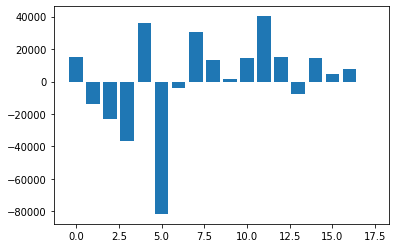

In [22]:
for i, v in enumerate(importancia):
  print('Feature: %0d, Score: %.5f' %(i, v) )

plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

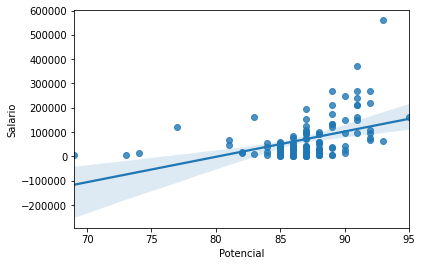

In [19]:
sns.regplot(x='Potencial', y='Salario', data=dados)

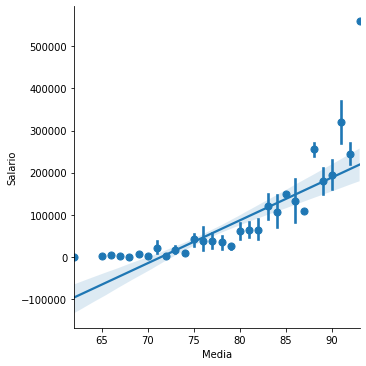

In [20]:
sns.lmplot(x='Media', y='Salario', data=dados, x_estimator=np.mean)

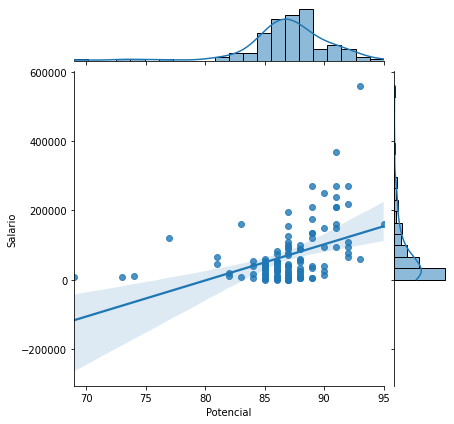

In [21]:
sns.jointplot(x='Potencial', y='Salario', data=dados, kind='reg')